In [8]:
! pip install numpy
! pip install pandas
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn


In [11]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве

Distances from p1 to p2:
1.7320508075688772
2.9999999999999996
1.0
3.0

Distances from p4 to p3:
1.7320508075688772
2.9999999999999996
1.0
3.0

Distances from p3 to p1:
3.4641016151377544
11.999999999999998
2.0
6.0

Disatnces from p4 to p2:
3.4641016151377544
11.999999999999998
2.0
6.0


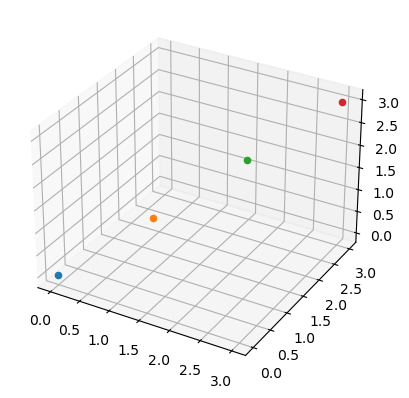

In [12]:
p1 = np.array([0, 0, 0])
p2 = np.array([1, 1, 1])
p3 = np.array([2, 2, 2])
p4 = np.array([3, 3, 3])

print('Distances from p1 to p2:')
print(np.linalg.norm(p2 - p1))
print(np.linalg.norm(p2 - p1) ** 2)
print(np.linalg.norm(p2 - p1, ord=np.inf))
print(np.linalg.norm(p2 - p1, ord=1))

print('\nDistances from p4 to p3:')
print(np.linalg.norm(p4 - p3))
print(np.linalg.norm(p4 - p3) ** 2)
print(np.linalg.norm(p4 - p3, ord=np.inf))
print(np.linalg.norm(p4 - p3, ord=1))

print('\nDistances from p3 to p1:')
print(np.linalg.norm(p3 - p1))
print(np.linalg.norm(p3 - p1) ** 2)
print(np.linalg.norm(p3 - p1, ord=np.inf))
print(np.linalg.norm(p3 - p1, ord=1))

print('\nDisatnces from p4 to p2:')
print(np.linalg.norm(p4 - p2))
print(np.linalg.norm(p4 - p2) ** 2)
print(np.linalg.norm(p4 - p2, ord=np.inf))
print(np.linalg.norm(p4 - p2, ord=1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p1[0], p1[1], p1[2])
ax.scatter(p2[0], p2[1], p2[2])
ax.scatter(p3[0], p3[1], p3[2])
ax.scatter(p4[0], p4[1], p4[2])
plt.show()


Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания необходимо использовать функцию arange

In [5]:
Z = np.zeros((5, 5))
Z += np.arange(5)
print(Z)


[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


Для предыдущего примера поэкспериментируйте с параметрами классификатора:

Установите другое количество ближайших соседей (k = 1, 5, 10).
Установите размер тестовой выборки 15% от всего датасета.
Постройте графики и оцените качество моделей, проанализируйте результаты.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [16]:
K = 3

iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:,:-1],
    iris.iloc[:,-1],
    test_size = 0.20
)

model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


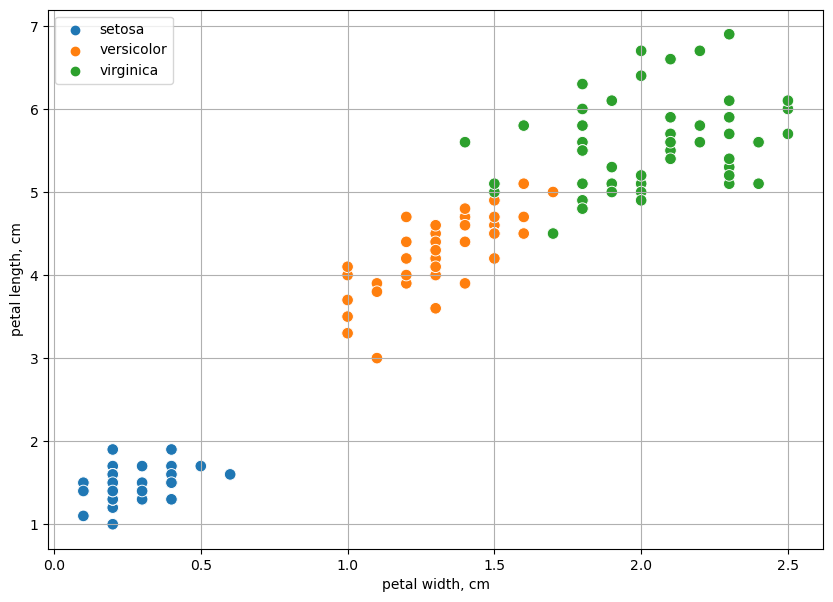

1.0


In [17]:
plt.figure(figsize=(10,7))
plt.xlabel('petal width, cm')
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('petal width, cm')
plt.ylabel('petal length, cm')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

plt.show()
print(f"{accuracy_score(y_test, y_pred):.3}")


Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков

In [18]:
from sklearn.feature_extraction import DictVectorizer


In [19]:
data_dict = [{'persuasion': 2, "intimidation": 4},
             {'persuasion': 4, "intimidation": 3},
             {'persuasion': 1, "deception": 2},
             {'persuasion': 2, "deception": 2}]

DictVectorizer(sparse=False).fit_transform(data_dict)


array([[0., 4., 2.],
       [0., 3., 4.],
       [2., 0., 1.],
       [2., 0., 2.]])